In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

In [2]:
samples = np.fromfile("data/915MHz_2048kHz_8dB_cap", dtype = complex, count = -1)
print(samples.shape)

(10240000,)


(399,) (1024,) (1024, 399)


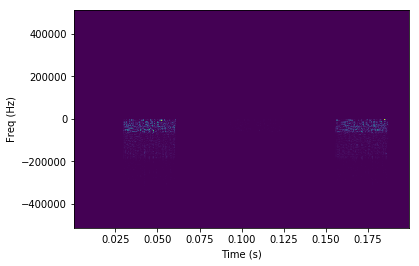

In [3]:
fs = 1024000
f, t, FFTsignal = spectrogram(samples[0:int(fs*0.2)], fs = fs, nperseg = 1024, noverlap = 512, mode = 'psd', return_onesided = False)

print(t.shape, f.shape, FFTsignal.shape)

plt.figure()
plt.pcolormesh(t, f, (FFTsignal))
plt.ylabel("Freq (Hz)")
plt.xlabel("Time (s)")
plt.show()

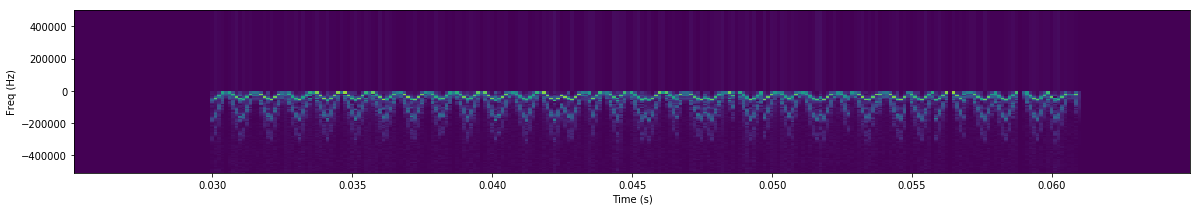

In [19]:
f, t, FFTsignal = spectrogram((samples[int(fs*0.025):int(fs*0.065)]), fs = fs, nperseg = 128, noverlap = 0, mode = 'magnitude', return_onesided = False, window='boxcar')
# TODO: might have to add time offset

t = t + 0.025

plt.figure(figsize = (20,3))
plt.pcolormesh(t, f, (FFTsignal))
plt.ylabel("Freq (Hz)")
plt.xlabel("Time (s)")
plt.show()

In [15]:
from scipy import signal

signal.get_window('boxcar', 128)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.])

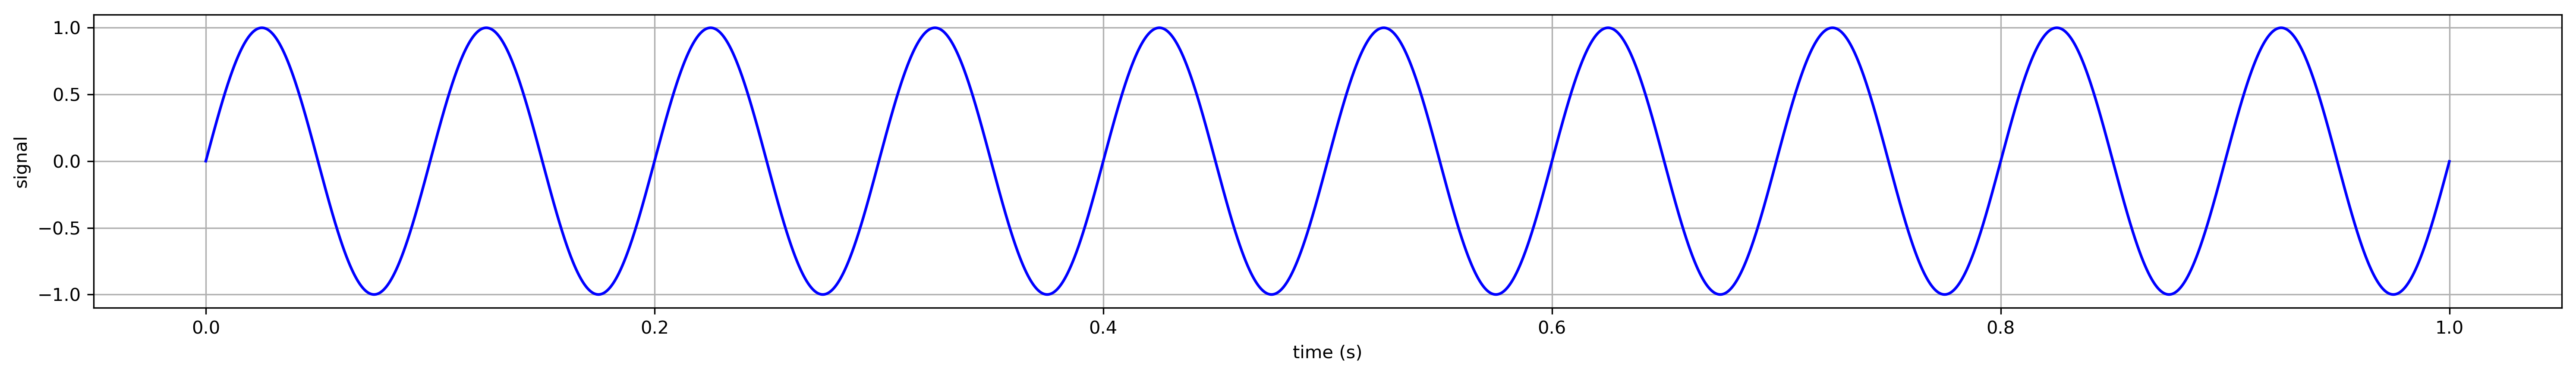

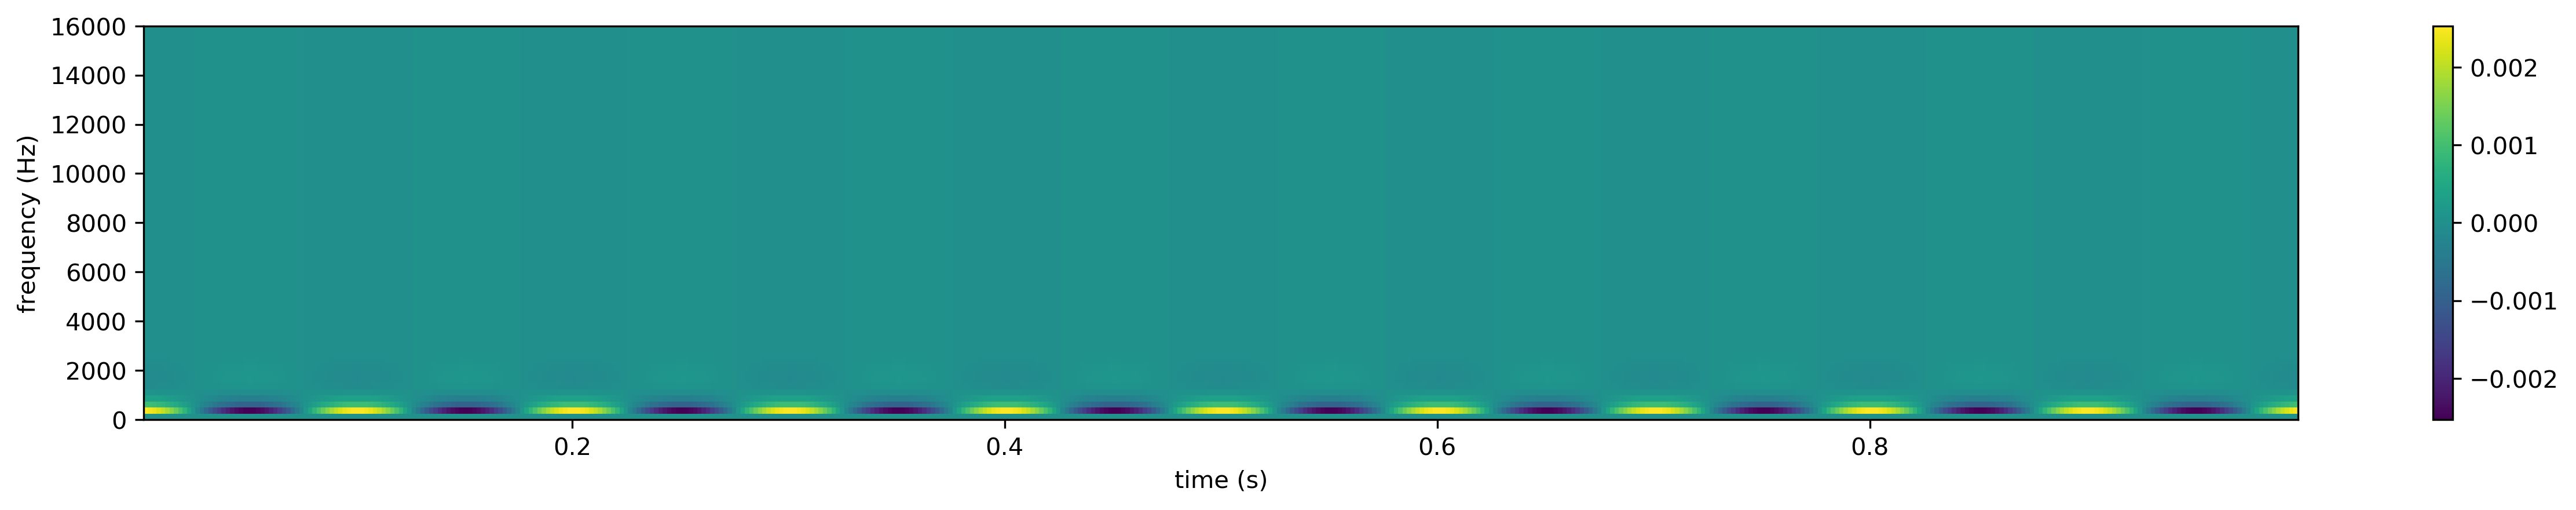

In [42]:
fs = 32000 # sampling frequency
t_start = 0.0 # start time
t_end = 1.0 # end time
n_samples = int(t_end*fs) - int(t_start*fs)

# sample time
t = np.linspace(t_start, t_end, n_samples, endpoint=False)

# generate a constant sine wave
f_sine = 10.0
phi = 0.0

# test 1: repeat the same signal for the I and Q channels
xi = np.sin(2*np.pi*f_sine*t + phi)
# xq = np.sin(2*np.pi*f_sine*t + phi)

plt.figure(figsize = (20,3), dpi = 300)
plt.plot(t, xi, 'b-')
plt.xlabel("time (s)")
plt.ylabel("signal")
plt.grid()
plt.tight_layout()

# try to generate and plot spectrogram next

f_spec, t_spec, Sxx = spectrogram(xi, fs, nperseg = 128, noverlap = 64, return_onesided = True, mode = 'complex')
plt.figure(figsize = (20, 3), dpi = 300)
plt.pcolormesh(t_spec, f_spec, np.imag(Sxx))
plt.colorbar()
plt.xlabel("time (s)")
plt.ylabel("frequency (Hz)")

plt.show()

0.0 0.9999375
